#                                         Linear Regression Model

Let's look at an example of a <b>linear regression model</b>. In this notebook, I have projected how many teachers an engineering college would need if a certain number of students takes admission there.

## 1) Reading data

In [359]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("engineering colleges in India.csv")
df = df.head(20)
df

,College Name,Genders Accepted,Campus Size,Total Student Enrollments,Total Faculty,Established Year,Rating,University,Courses,Facilities,City,State,Country,College Type,Average Fees
0,National Institute of Technology Rourkela,Co-Ed,647 Acres,4811,329,2007,3.12,NaN,"B.Tech Mechanical Engineering, B.Tech Computer...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Rourkela,Odisha,India,Public/Government,350600.0
1,Visvesvaraya National Institute of Technology ...,Co-Ed,215 Acres,1071,192,2007,NaN,NaN,"B.Tech Computer Science Engineering, B.Tech El...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Nagpur,Maharashtra,India,Public/Government,273596.6666666667
2,Netaji Subhas University of Technology,Co-Ed,145 Acres,3759,101,2018,NaN,NaN,"B.Tech Computer Engineering, B.Tech Electronic...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",New Delhi,Delhi,India,Public/Government,352320.0
3,Birla Institute of Technology,Co-Ed,980 Acres,4506,284,1955,NaN,NaN,"B.Tech Computer Science Engineering, B.Tech El...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Ranchi,Jharkhand,India,Private,596686.0465116279
4,International Institute of Information Technology,Co-Ed,66 Acres,1721,85,2001,3.05,NaN,"B.Tech Computer Science and Engineering, M.Tec...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Hyderabad,Telangana,India,Private,756666.6666666666
5,BMS College of Engineering,Co-Ed,15 Acres,5610,298,1946,3.83,"Visvesvaraya Technological University, Belagavi","BE Civil Engineering, BE Computer Science and ...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Bengaluru,Karnataka,India,Private,71558.66666666667
6,Institute of Chemical Technology,Co-Ed,16 Acres,1753,116,2008,3.77,NaN,"BE Chemical Engineering, B.Tech Fibres and Tex...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Mumbai,Maharashtra,India,Public/Government,189512.8205128205
7,Banaras Hindu University,Co-Ed,1300 Acres,27946,1637,1916,3.41,NaN,"BA Social Science, BA, B.Com, BA Hons, BA Soci...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Varanasi,Uttar Pradesh,India,Public/Government,82548.89763779528
8,Thapar Institute of Engineering and Technology,Co-Ed,250 Acres,8150,482,1956,3.29,NaN,"BE Computer Engineering, BE Mechanical Enginee...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Patiala,Punjab,India,Private,736823.0769230769
9,Shanmugha Arts Science Technology Research and...,Co-Ed,232 Acres,9838,750,2001,3.54,NaN,"B.Tech Computer Science and Engineering, B.Tec...","Boys Hostel, Girls Hostel, Gym, Library, Sport...",Thanjavur,Tamil Nadu,India,Private,415918.0327868852


## 2) Information about data

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   College Name               20 non-null     object
 1   Genders Accepted           20 non-null     object
 2   Campus Size                20 non-null     object
 3   Total Student Enrollments  19 non-null     object
 4   Total Faculty              20 non-null     object
 5   Established Year           20 non-null     object
 6   Rating                     12 non-null     object
 7   University                 1 non-null      object
 8   Courses                    20 non-null     object
 9   Facilities                 20 non-null     object
 10  City                       20 non-null     object
 11  State                      20 non-null     object
 12  Country                    20 non-null     object
 13  College Type               20 non-null     object
 14  Average Fees

## 3)Checking Null Values
To make the model more powerful our data should not have any null values 

In [361]:
df.isna().sum()

College Name                  0
Genders Accepted              0
Campus Size                   0
Total Student Enrollments     1
Total Faculty                 0
Established Year              0
Rating                        8
University                   19
Courses                       0
Facilities                    0
City                          0
State                         0
Country                       0
College Type                  0
Average Fees                  0
dtype: int64

## 4)Removing Null values

In [362]:
df["Total Student Enrollments"].fillna(0 , inplace=True)
df["Total Faculty"].fillna(0 , inplace=True)


## 5) Any Null Value now?

In [363]:
df.isna().sum() 

College Name                  0
Genders Accepted              0
Campus Size                   0
Total Student Enrollments     0
Total Faculty                 0
Established Year              0
Rating                        8
University                   19
Courses                       0
Facilities                    0
City                          0
State                         0
Country                       0
College Type                  0
Average Fees                  0
dtype: int64

## 6) Changing Data Type
For doing the mathematical operations data should be in numeric format so let's make happen  it 

In [364]:
df["Total Student Enrollments"] = df["Total Student Enrollments"].astype(int)
df["Total Faculty"] = df["Total Faculty"].astype(int)


## 7) Checking Data Type
Let's check again the data type for "Number of students" and "Number of Teachers"

In [365]:
display(df["Total Student Enrollments"].dtype)
display(df["Total Faculty"].dtype)

dtype('int32')

dtype('int32')

## 8) Is it true more Students requires more Teachers?
Let's visualize the above fact

<IPython.core.display.Javascript object>


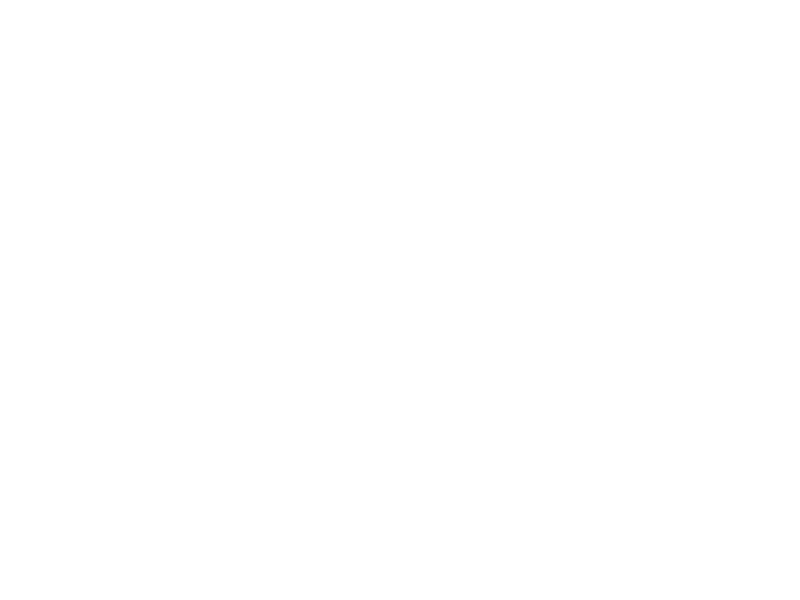

In [366]:
%matplotlib notebook
plt.scatter(df["Total Student Enrollments"] , df["Total Faculty"],label = "Number of Faculty Per Students",color = "black",
            marker = "*")
plt.legend()
plt.xlabel("Number of Student")
plt.ylabel("Number of Faculty")
plt.show()

## Model 

## 9) Spliting data into Training set and Testing Set
Here i have divided the engineering college in two parts,where training data consider around 70% of colleges out of 
total colleges and testing data has 3% of colleges

In [367]:
from sklearn.model_selection import train_test_split

x = df["Total Student Enrollments"].values.reshape(-1, 1)
y = df["Total Faculty"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## 10) Training set & Testing set
Yellow dots represent training set while green dots represents testing set

<IPython.core.display.Javascript object>


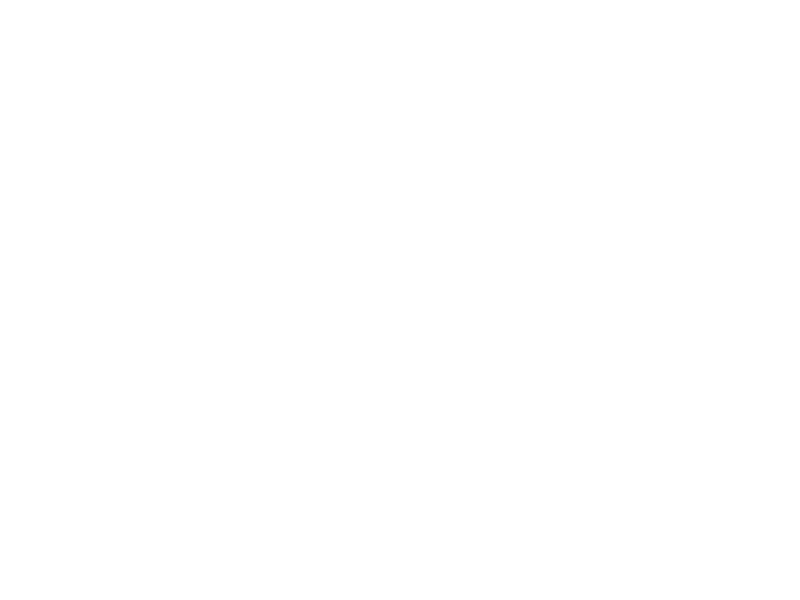

In [368]:
%matplotlib notebook
plt.scatter(x_train, y_train, label="Training set", color="orange", alpha=1)
plt.scatter(x_test, y_test, label="Testing set", color="green", alpha=1)

plt.title("Training & Testing Data")
plt.xlabel("Number of Student")
plt.ylabel("Number of Teachers")
plt.legend()
plt.show()

## 11) Model for Prediction of number of teacher required

In [369]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


## 12) Feeding Model

In [370]:
model.fit(x_train, y_train)
prediction = model.predict(x_test)

## 13) Visualize the predictions

<IPython.core.display.Javascript object>


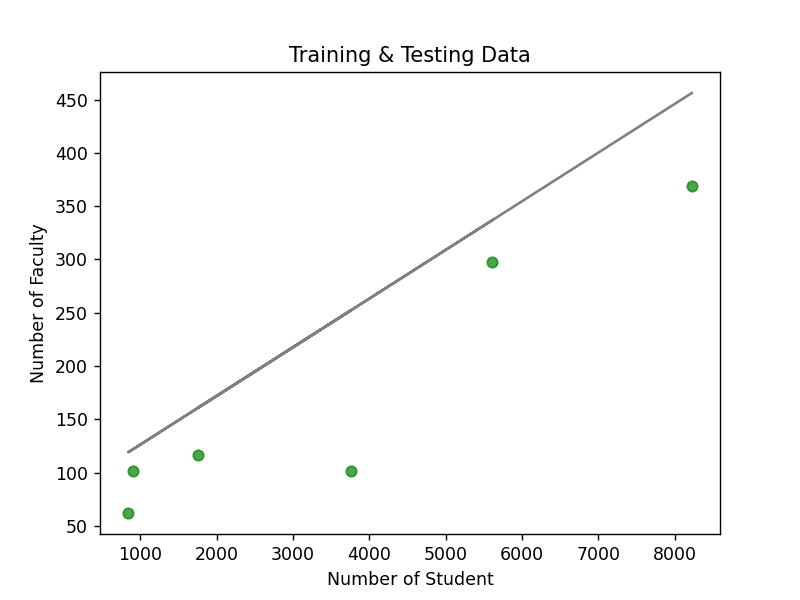

In [371]:
%matplotlib notebook
plt.plot(x_test , prediction, color="gray")
plt.scatter(x_test, y_test,color="green",alpha=.7)
plt.title("Training & Testing Data")
plt.xlabel("Number of Student")

plt.ylabel("Number of Faculty")
plt.show()

## 14) Testing Model
Now the model is ready to give the solution of your problem, so let's check it

### Que = How many teacher are required if there are 790 students are taking admission to college

In [372]:
student_count = 30000
# let's check how much count of faculty require if studetnt are 790
teacher_count =model.predict(np.array([[student_count]]))[0]
print("Total '{}' teachers are reuired for '{}' number of students".format(int(teacher_count) , student_count))

Total '1451' teachers are reuired for '30000' number of students
